Program : 2 
==================================================================================================
Sales (sid, year, totalsales)

Create above table into a SQLite database with appropriate constraints. 

A. Insert at least 5-10 records into the sales table. 
B. Export sales table data into sales.csv file.
C. Write a python scripts that read the sales.csv file and plot a bar chart that shows totalsales of the year. 

Also decorate the chart with appropriate title, lables, colours etc.

In [1]:
import sqlite3 as sq
import pandas as pd
import csv
import matplotlib.pyplot as plt 

In [3]:
conn=sq.connect("sales.dbs")
cur=conn.cursor()

In [10]:
cur.execute("create table saless(sid int primary key,year int,totalsales int);")

In [5]:
q="insert into saless values(?,?,?);"

In [16]:
l=[]
for i in range(5):
    sid=int(input("Enter sales id:"))
    year=int(input("Enter sales year:"))
    totalsales=int(input("Enter total sales:"))
    t=(sid,year,totalsales)
    l.append(t)

Enter sales id:1
Enter sales year:2019
Enter total sales:2500
Enter sales id:2
Enter sales year:2020
Enter total sales:3200
Enter sales id:3
Enter sales year:2019
Enter total sales:2800
Enter sales id:4
Enter sales year:2020
Enter total sales:3400
Enter sales id:5
Enter sales year:2019
Enter total sales:3900


In [18]:
cur.executemany(q,l)

In [19]:
cur.execute("select * from saless")

In [20]:
data=cur.fetchall()

In [21]:
print(data)

[(1, 2019, 2500), (2, 2020, 3200), (3, 2019, 2800), (4, 2020, 3400), (5, 2019, 3900)]


In [22]:
conn.close()

In [32]:
with open("C:\\henil\\python\\sales.csv","w",newline="") as f:
    obj=csv.writer(f)
    obj.writerow(["sid","year","totalsale"])
    obj.writerows(data)

In [33]:
read=pd.read_csv("C:\\henil\\python\\sales.csv")

In [34]:
read

,sid,year,totalsale
0,1,2019,2500
1,2,2020,3200
2,3,2019,2800
3,4,2020,3400
4,5,2019,3900


In [52]:
year=read["year"].tolist()
total=read["totalsale"].tolist()

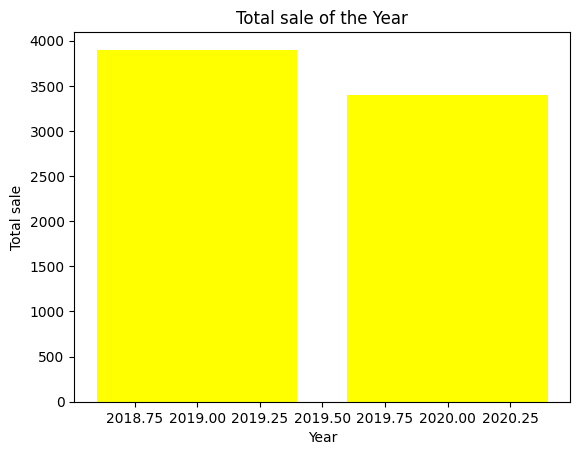

In [53]:
plt.bar(year,total,color="yellow")
plt.xlabel("Year")
plt.ylabel("Total sale")
plt.title("Total sale of the Year")
plt.show()
